# Model:

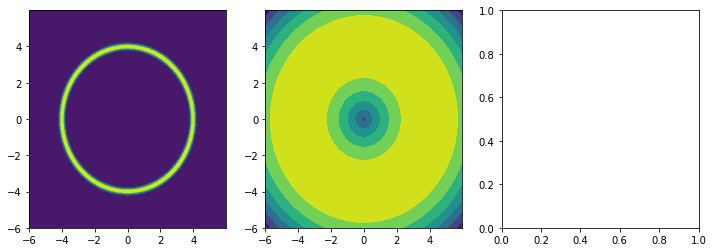

In [1]:
import numpy as np
import itertools as it
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

def magnitude_logpdf(x):
    # x has shape batch_size x 2
    prior_logpdf = sum(norm.logpdf(x[:,d], loc=0, scale=2) for d in [0, 1])
    magnitude = np.sqrt(x[:,0]**2+x[:,1]**2)
    likelihood_logpdf = norm.logpdf(np.array([4.]), loc=magnitude, scale=0.1)
    return prior_logpdf + likelihood_logpdf

# def gaussian_gaussian_grad_logpdf(x):
#     def grad_norm_logpdf_dx(x, loc, scale):
#         # x: (batch_size or 1) x dim
#         # loc: (batch_size or 1) x dim
#         # scale: scalar
#         assert len(x.shape) == 2
#         assert len(loc.shape) == 2
#         assert type(scale) == float
#         assert x.shape[1] == loc.shape[1]
#         return -(x - loc) / scale**2
#     def grad_norm_logpdf_dmu(x, loc, scale):
#         return grad_norm_logpdf_dx(loc, x, scale)
#     prior_grad_logpdf = grad_norm_logpdf_dx(x, loc=np.array([[1.]]), scale=5**0.5)
#     likelihood_grad_logpdf = sum(grad_norm_logpdf_dmu(y, loc=x, scale=2**0.5)
#                                  for y in [np.array([[8]]), np.array([[9]])])
#     return prior_grad_logpdf + likelihood_grad_logpdf

def f(X):
    # we are inferring true magnitude
    return np.sqrt((X**2).sum(axis=1))

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
X1 = np.arange(-6, 6, 0.01)
X = np.array(list(it.product(X1, X1)))
logpdf = magnitude_logpdf(X)
pdf = np.exp(logpdf) / np.exp(logpdf).sum()
axes[0].contourf(X1, X1, pdf.reshape(len(X1), len(X1)))
axes[1].contourf(X1, X1, logpdf.reshape(len(X1), len(X1)))
plt.show()

In [7]:
from log_prob_model import HyperDistribution

def infer_expectation(f, logpdf, n_samples, grad_logpdf=None):
    process = HyperDistribution(2, None, None)  # 2-dimensional, default kernel parameters
    process.set_grid([-6, 6], 0.3)
    def display(n):
        ex_samples = process.sample_expectation(f, 100)
        print(f"{n} samples. Integral: {ex_samples.mean():.4f} +- {ex_samples.std():.4f}")
        process.plot()
        plt.show()
    for n in range(n_samples):
        display(n)
        X = process.BOED(f, 10000)
        process.observe(X, logpdf(X), None if grad_logpdf is None else grad_logpdf(X))
    display(n_samples)

0 samples. Integral: 4.6394 +- 1.8573


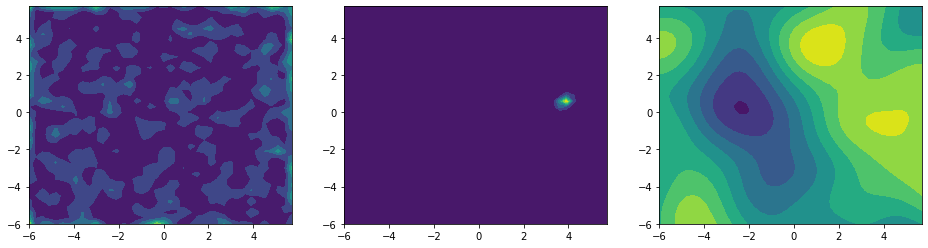

IndexError: too many indices for array

In [8]:
infer_expectation(f, magnitude_logpdf, 20)